<a href="https://colab.research.google.com/github/HoseinNekouei/RNN-Exercise/blob/main/HW1_RNN%26Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# RunGPU
!nvidia-smi

Mon Feb 12 20:02:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# **Exercise 1.**

In [ ]:
from keras import layers
import numpy as np

In [ ]:
# Exercise 1.

# an Array with shape ( 10, 8) & batch_size = 32
input = np.random.random([32, 10, 8]).astype(np.float32)
print(f'shape of input: {input.shape}')

simple_rnn = layers.SimpleRNN(4)
output = simple_rnn(input)

print(f'Shape of output: {output.shape}')

simple_rnn = layers.SimpleRNN(units= 4, return_state = True, return_sequences = True)
whole_sequences_output, final_state = simple_rnn(input)

print(f'whole of sequences output:\n {whole_sequences_output[0]},\
shape: {whole_sequences_output.shape}')

print(f'final state:\n {final_state[0]} , shape: {final_state.shape}')

shape of input: (32, 10, 8)
Shape of output: (32, 4)
whole of sequences output:
 [[-0.40076604  0.5143362   0.67533463  0.7213934 ]
 [-0.6241306   0.53941995  0.709072    0.24938749]
 [-0.22702168  0.45321018  0.92233133  0.25101095]
 [-0.7319531   0.7697972   0.777375    0.5991269 ]
 [-0.66715026  0.8465206   0.9078952   0.33567363]
 [-0.810157    0.9491324   0.9213793   0.5794017 ]
 [-0.76917946  0.9177375   0.93170863  0.12893178]
 [-0.29773605  0.5486951   0.874091    0.5553814 ]
 [-0.85047156  0.84777194  0.6928838   0.49473017]
 [-0.69912195  0.69406635  0.7592431   0.48907652]],shape: (32, 10, 4)
final state:
 [-0.69912195  0.69406635  0.7592431   0.48907652] , shape: (32, 4)


# **Exercise 2.**

> **Train MNIST dataset**



### **2.1. Bulid a MLP model**

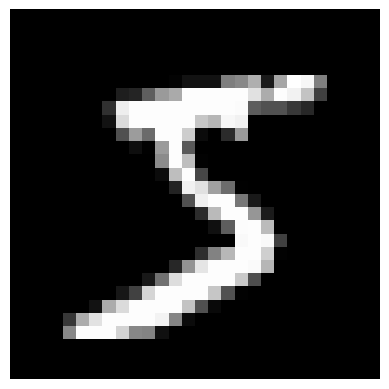

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = mnist.load_data() # load mnist dataset
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

plt.imshow(x_train[0], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Normalize features
x_train , x_test = x_train/255.0 , x_test/255.0

# build MLP model with MNIST Dataset
model = Sequential([
                  layers.Flatten(),
                  layers.Dense(256, activation = 'relu'),
                  layers.Dense(128, activation = 'relu'),
                  layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='SGD',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['Accuracy'])

# train data
model.fit(x_train,
          y_train,
          batch_size=32,
          epochs= 15,
          validation_data= (x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy :.2f} , Test loss: {test_loss  :.2f}')

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5946 - Accuracy: 0.8475 - val_loss: 0.2955 - val_Accuracy: 0.9191
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2778 - Accuracy: 0.9207 - val_loss: 0.2403 - val_Accuracy: 0.9311
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2276 - Accuracy: 0.9350 - val_loss: 0.1991 - val_Accuracy: 0.9433
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1945 - Accuracy: 0.9442 - val_loss: 0.1773 - val_Accuracy: 0.9479
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1698 - Accuracy: 0.9514 - val_loss: 0.1651 - val_Accuracy: 0.9513
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1511 - Accuracy: 0.9569 - val_loss: 0.1466 - val_Accuracy: 0.9586
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1360 - Accuracy: 0.9613 - val_loss: 0.1350 - val_Accuracy:

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **2.2. Build a RNN model**

In [ ]:
# build SimpleRNN model for MNIST Dataset
# I don't need to use pad_sequence because each vector is exactly 255 items.
from keras.layers import SimpleRNN, Dense

# Preprocess data
x_train= x_train / 255.0
x_test= x_test / 255.0

assert x_train.shape== (60000, 28, 28)
assert x_test.shape== (10000, 28, 28)

In [ ]:
# build the SimpleRnn model
model = Sequential([
    SimpleRNN(256, input_shape = (28, 28), return_sequences= True),
    SimpleRNN(128),
    Dense(10, activation = 'softmax')
])

# Compile the model
model.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics=['Accuracy'])

# Train the Model
model.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 15,
          validation_data = (x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy :.2f} , Test loss: {test_loss  :.2f}')

Epoch 1/15
1875/1875 [==============================] - 61s 32ms/step - loss: 1.1307 - Accuracy: 0.5850 - val_loss: 0.7443 - val_Accuracy: 0.7402
Epoch 2/15
1875/1875 [==============================] - 63s 34ms/step - loss: 0.6163 - Accuracy: 0.7941 - val_loss: 0.5212 - val_Accuracy: 0.8363
Epoch 3/15
1875/1875 [==============================] - 59s 31ms/step - loss: 0.4524 - Accuracy: 0.8544 - val_loss: 0.4116 - val_Accuracy: 0.8718
Epoch 4/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3677 - Accuracy: 0.8863 - val_loss: 0.3499 - val_Accuracy: 0.8886
Epoch 5/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3141 - Accuracy: 0.9015 - val_loss: 0.3383 - val_Accuracy: 0.8948
Epoch 6/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2671 - Accuracy: 0.9180 - val_loss: 0.4120 - val_Accuracy: 0.8786
Epoch 7/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2277 - Accuracy: 0.9319 - val_loss: 0.2135 -

# **Exercise 3.**

> ***Conclution**

> An MLP model with two layers has twice as many parameters as a SimpleRNN
but produces similar results.

In [ ]:
model.summary()

"""
SimpleRNN Params equal to recurrent_weights + input_weights + biases

for first layer the params equal to:
  recurrent_weights = num_units* num_units (256 * 256 = 65,536)
  input_weights = num_features* num_units (28 * 256 = 7,168)
  bias = num_units (256)

  Total Params of SimpleRNN layer = 72,960
"""

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 28, 256)           72960     
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 128)               49280     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 123530 (482.54 KB)
Trainable params: 123530 (482.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


'\nSimpleRNN Params equal to recurrent_weights + input_weights + biases\n\nfor first layer the params equal to:\n  recurrent_weights = num_units* num_units (256 * 256 = 65,536)\n  input_weights = num_features* num_units (28 * 256 = 7,168)\n  bias = num_units (256)\n\n  Total Params of SimpleRNN layer = 72,960\n'

# **Excercise 4.**

> **Video Classification**

با توجه به وابستگی هر فریم ویدئو به فریم قبلی خودش برای استخراج ویژگی بهتر است از شبکه های بازگشتی عصبی استفاده کنیم و برای استخراج ویژگی از شبکه های عصبی پیچیده

در فریم های ویدئو هر فریم به فریم قبلی خودش وابسته است که لزوم استفاده از شبکه بازگشتی را نشان می دهد. در اینحالت هر فریم که شامل تعداد عکس است بعنوان فیچرها به شبکه داده می شود

